In [118]:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [139]:
data.describe()

,CRIM,ZN,INDUS,CHAS,RM,AGE,RAD,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,6.284634,68.574901,9.549407,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.702617,28.148861,8.707259,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,3.561000,2.900000,1.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,5.885500,45.025000,4.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,6.208500,77.500000,5.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,6.623500,94.075000,24.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,8.780000,100.000000,24.000000,22.000000,396.900000,37.970000,50.000000


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Пропусков не наблюдаю

In [121]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

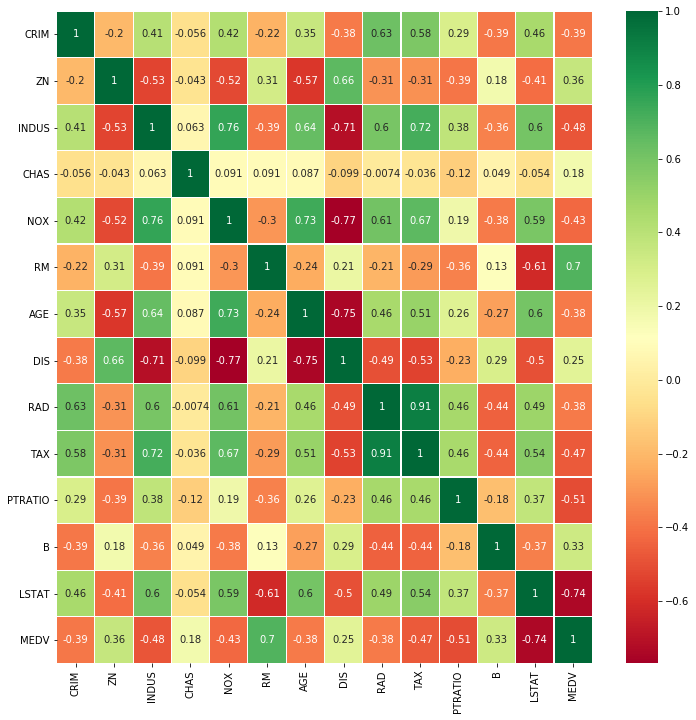

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Удаляю сильно коррелирующие признаки (при значениях от 0,7), тк связи между признаками будут портить линейную модель.  
Отмечу корреляцию между:  
INDUS и (NOX)  
INDUS и (DIS)  
INDUS и (TAX)  
(NOX) и AGE  
NOX и (DIS)  
AGE и (DIS)  
RAD и (TAX)  
INDUS сильная корреляция 3 раза  
NOX - 3  
DIS - 3   
AGE - 2  
TAX - 2  
RAD - 1  
После построения графа (строил на бумаге), можно смело удалять сильно коррелирующие признаки, чтобы освободить остальные признаки, но сделать это нужно так, чтобы кол-во удалений было минимальным, те нам поможет граф. С помощью графа я определил, что можно сливать: NOX, DIS, TAX  
Таким образом мы сделали минимальное кол-во удалений 3 и сохранили свободными INDUS, AGE, RAD.

Буду дальше работать с data_new, чтобы в итоге сделать сравнение.

In [123]:
data_new = data

In [124]:
data_new.drop(['NOX', 'DIS', 'TAX'], axis='columns', inplace=True)

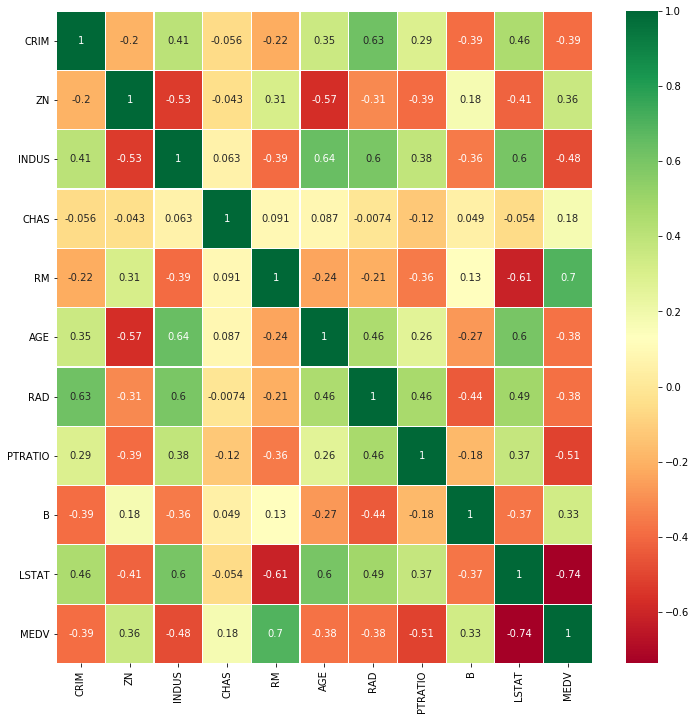

In [125]:
sns.heatmap(data_new.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

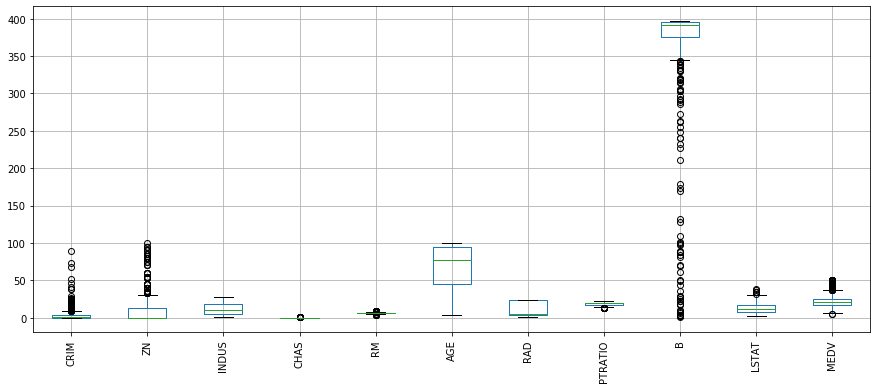

In [126]:
boxplot = data_new.boxplot(figsize=(15,6), rot=90)

Рассмотрим макс. значения CRIM и ZN и мин. B

In [127]:
data_new.describe()

,CRIM,ZN,INDUS,CHAS,RM,AGE,RAD,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,6.284634,68.574901,9.549407,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.702617,28.148861,8.707259,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,3.561000,2.900000,1.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,5.885500,45.025000,4.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,6.208500,77.500000,5.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,6.623500,94.075000,24.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,8.780000,100.000000,24.000000,22.000000,396.900000,37.970000,50.000000


In [128]:
data_new.query('B < 270').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 32 to 466
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     48 non-null     float64
 1   ZN       48 non-null     float64
 2   INDUS    48 non-null     float64
 3   CHAS     48 non-null     int64  
 4   RM       48 non-null     float64
 5   AGE      48 non-null     float64
 6   RAD      48 non-null     int64  
 7   PTRATIO  48 non-null     float64
 8   B        48 non-null     float64
 9   LSTAT    48 non-null     float64
 10  MEDV     48 non-null     float64
dtypes: float64(9), int64(2)
memory usage: 4.5 KB


48 значений из 506 ~ 9%. Просто удалю.

In [129]:
data_new = data_new.query('B > 270')

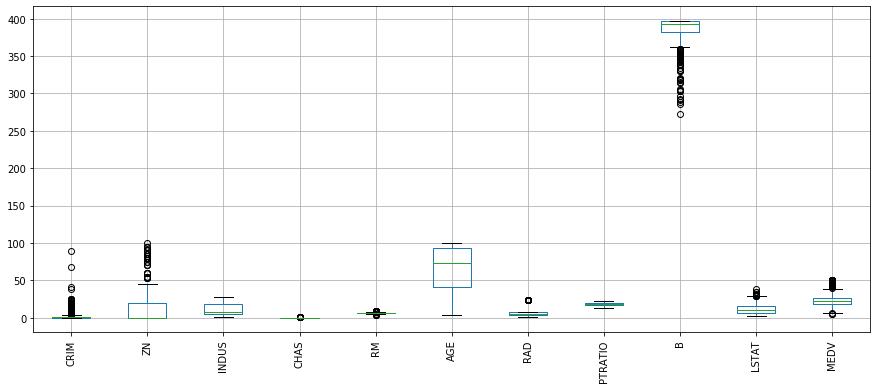

In [130]:
boxplot = data_new.boxplot(figsize=(15,6), rot=90)

Выбросов стало меньше. еще чуть-чуть почистим CRIM 

In [131]:
data_new.query('CRIM > 25').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 380 to 405
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     5 non-null      float64
 1   ZN       5 non-null      float64
 2   INDUS    5 non-null      float64
 3   CHAS     5 non-null      int64  
 4   RM       5 non-null      float64
 5   AGE      5 non-null      float64
 6   RAD      5 non-null      int64  
 7   PTRATIO  5 non-null      float64
 8   B        5 non-null      float64
 9   LSTAT    5 non-null      float64
 10  MEDV     5 non-null      float64
dtypes: float64(9), int64(2)
memory usage: 480.0 bytes


In [132]:
data_new = data_new.query('CRIM < 25')

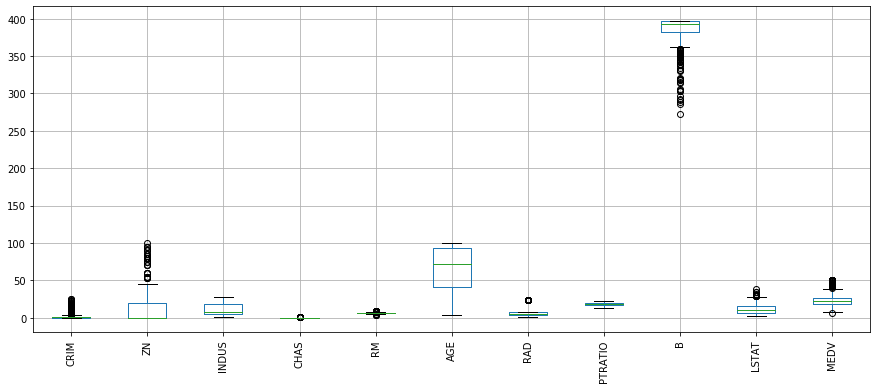

In [133]:
boxplot = data_new.boxplot(figsize=(15,6), rot=90)

In [134]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 505
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     453 non-null    float64
 1   ZN       453 non-null    float64
 2   INDUS    453 non-null    float64
 3   CHAS     453 non-null    int64  
 4   RM       453 non-null    float64
 5   AGE      453 non-null    float64
 6   RAD      453 non-null    int64  
 7   PTRATIO  453 non-null    float64
 8   B        453 non-null    float64
 9   LSTAT    453 non-null    float64
 10  MEDV     453 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 42.5 KB


Выбросов все равно много, но и данных уже удалено около 10%, мб еще что-то можно придумать, но я начну обучение.

In [135]:
X = data_new[data_new.columns[:-1]]

In [136]:
y = data_new['MEDV']

In [137]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [138]:
reg = LinearRegression().fit(X, y)
print(f'Weights: {reg.coef_}')
print(f'Bias: {reg.intercept_}')

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-4.24719068e-02 -4.34324417e-03 -1.23557459e-02  3.13461532e+00
  5.17685109e+00  6.69595692e-03  7.30798684e-02 -9.10550661e-01
 -1.57478441e-03 -5.29375163e-01]
Bias: 13.428299294092387
Error: 3.414226287309027


Посмотрим исходный дата сет.

In [140]:
X = data[data.columns[:-1]]
y = data['MEDV']
reg = LinearRegression().fit(X, y)
print(f'Weights: {reg.coef_}')
print(f'Bias: {reg.intercept_}')

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-7.52381153e-02  2.64204551e-04 -4.13060972e-02  3.06778831e+00
  4.41103947e+00  1.39564088e-02  9.40059160e-02 -9.37600963e-01
  1.05770393e-02 -5.45485207e-01]
Bias: 13.90639598048574
Error: 3.47787197961371


Изменение Error в 0.06 ))  
Попробую удалить столбцы с выбросами, тк в них мало закономерности.

In [141]:
data_new_2 = data_new

In [142]:
data_new_2.drop(['CRIM', 'ZN', 'B'], axis='columns', inplace=True)

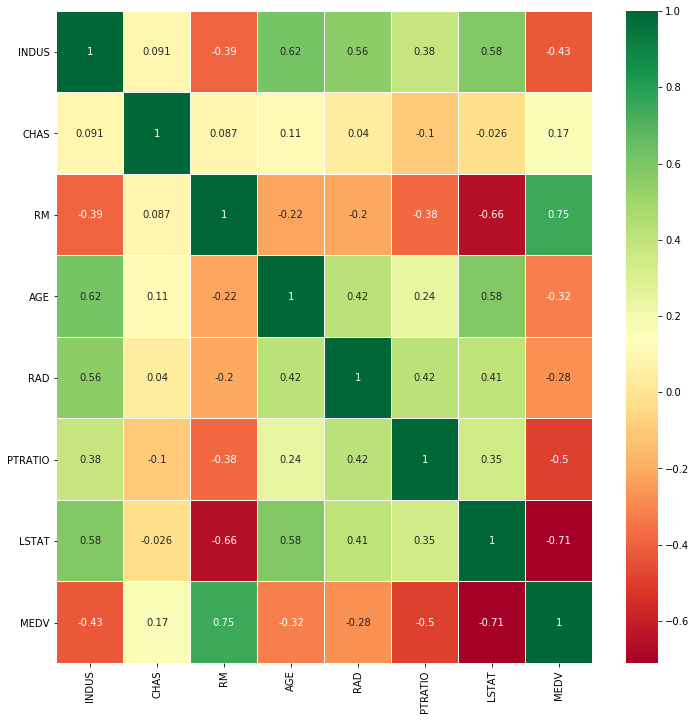

In [143]:
sns.heatmap(data_new_2.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [146]:
X = data_new_2[data_new_2.columns[:-1]]
y = data_new_2['MEDV']
reg = LinearRegression().fit(X, y)
print(f'Weights: {reg.coef_}')
print(f'Bias: {reg.intercept_}')

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-0.00701977  3.17652053  5.14802626  0.00835672  0.0551387  -0.89686344
 -0.53862098]
Bias: 12.699522375529614
Error: 3.4150438843185396


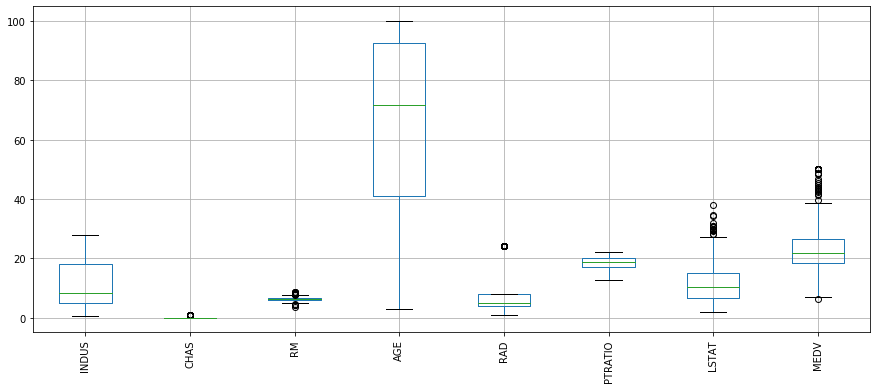

In [148]:
boxplot = data_new_2.boxplot(figsize=(15,6), rot=90)

Практически ничего не изменилось, но признаков стало меньше.

In [150]:
data_new_2.query('LSTAT > 30').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 48 to 388
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   INDUS    8 non-null      float64
 1   CHAS     8 non-null      int64  
 2   RM       8 non-null      float64
 3   AGE      8 non-null      float64
 4   RAD      8 non-null      int64  
 5   PTRATIO  8 non-null      float64
 6   LSTAT    8 non-null      float64
 7   MEDV     8 non-null      float64
dtypes: float64(6), int64(2)
memory usage: 576.0 bytes


In [151]:
data_new_2 = data_new_2.query('LSTAT < 30')

In [162]:
data_new_2.query('MEDV > 35').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 4 to 304
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   INDUS    17 non-null     float64
 1   CHAS     17 non-null     int64  
 2   RM       17 non-null     float64
 3   AGE      17 non-null     float64
 4   RAD      17 non-null     int64  
 5   PTRATIO  17 non-null     float64
 6   LSTAT    17 non-null     float64
 7   MEDV     17 non-null     float64
dtypes: float64(6), int64(2)
memory usage: 1.2 KB


In [163]:
data_new_2 = data_new_2.query('MEDV < 35')

In [164]:
X = data_new_2[data_new_2.columns[:-1]]
y = data_new_2['MEDV']
reg = LinearRegression().fit(X, y)
print(f'Weights: {reg.coef_}')
print(f'Bias: {reg.intercept_}')

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-0.03743751  1.75762958  2.77986102 -0.01839115 -0.02459108 -0.60943208
 -0.42472601]
Bias: 22.37419414664941
Error: 2.3620923572071755


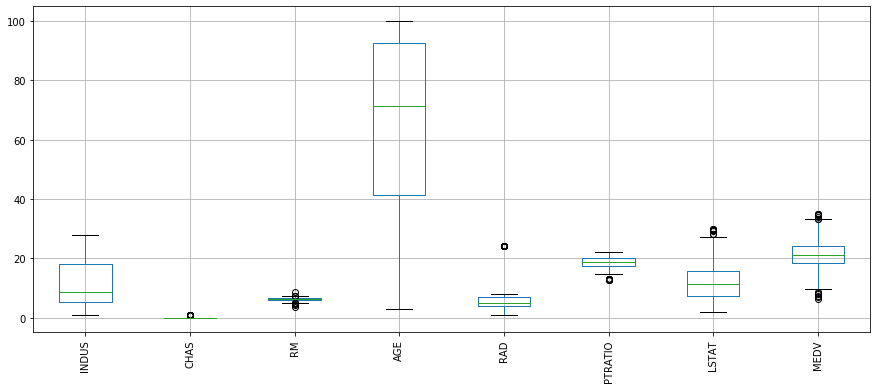

In [165]:
boxplot = data_new_2.boxplot(figsize=(15,6), rot=90)

In [167]:
data_new_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 505
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   INDUS    397 non-null    float64
 1   CHAS     397 non-null    int64  
 2   RM       397 non-null    float64
 3   AGE      397 non-null    float64
 4   RAD      397 non-null    int64  
 5   PTRATIO  397 non-null    float64
 6   LSTAT    397 non-null    float64
 7   MEDV     397 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 27.9 KB


После чистки выбросов ошибка модели уменьшилась на 1,12.  
Данных было удалено около 20%.